# Employee Salary Prediction

This notebook demonstrates a complete machine learning workflow to predict whether an employee earns more than 50K or not, based on demographic and work-related features.

In [1]:
import pandas as pd

df = pd.read_csv('./data/adult_3.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Visualization
Visualize the data to better understand feature distributions and relationships.

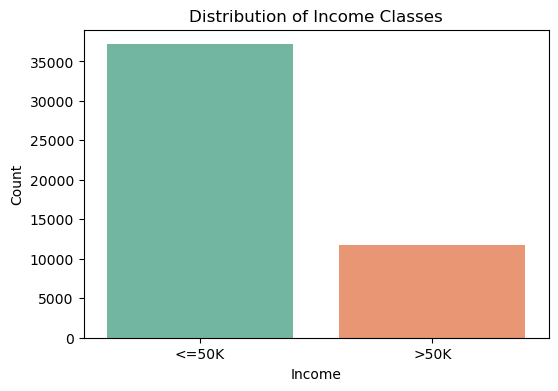

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the distribution of the target variable (income)
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df, palette='Set2')
plt.title('Distribution of Income Classes')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

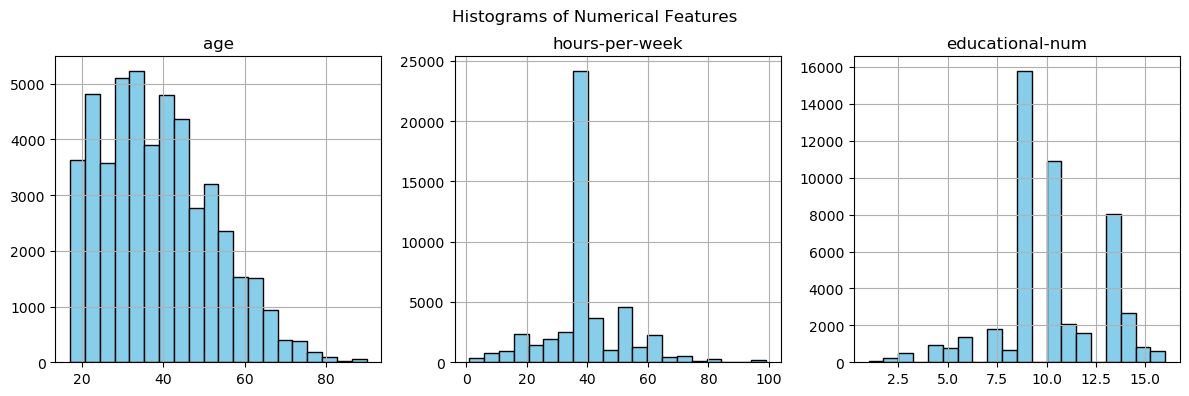

In [3]:
# Plot histograms for key numerical features
num_features = ['age', 'hours-per-week', 'educational-num']
df[num_features].hist(bins=20, figsize=(12, 4), layout=(1, len(num_features)), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

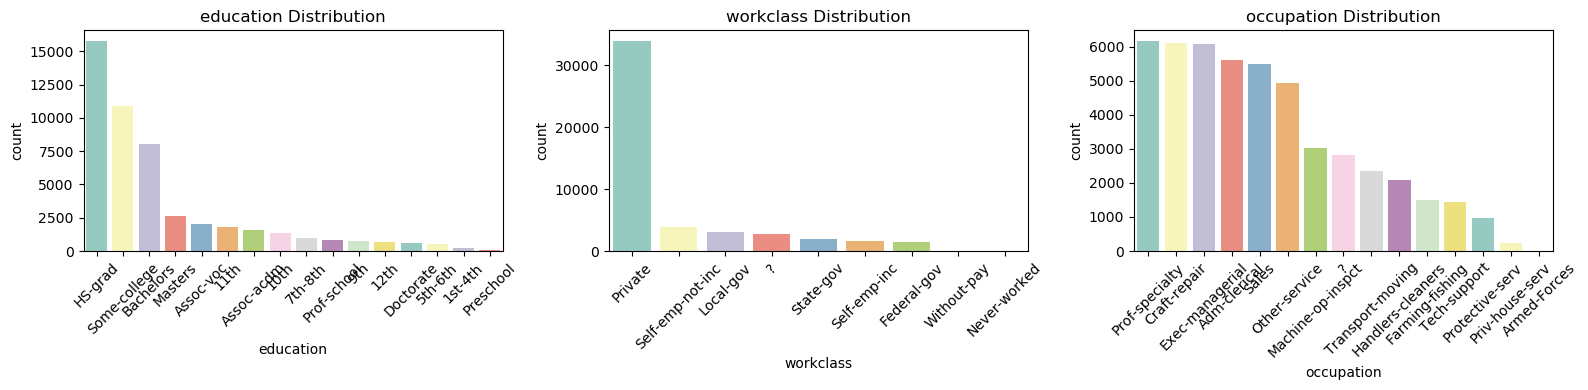

In [4]:
# Bar plots for categorical features
cat_features = ['education', 'workclass', 'occupation']
fig, axes = plt.subplots(1, len(cat_features), figsize=(16, 4))
for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set3', order=df[col].value_counts().index)
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

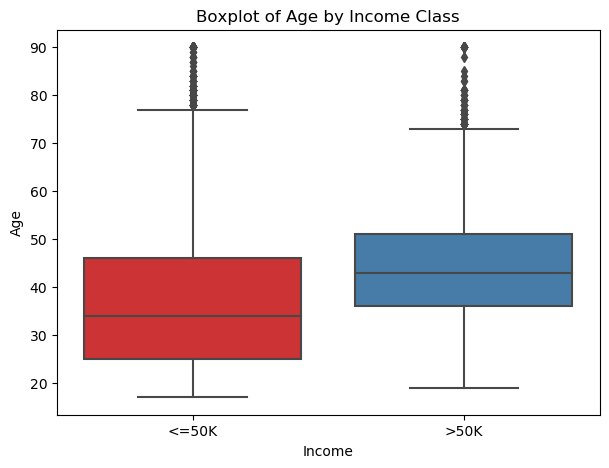

In [5]:
# Boxplot: Age vs. Income
plt.figure(figsize=(7, 5))
sns.boxplot(x='income', y='age', data=df, palette='Set1')
plt.title('Boxplot of Age by Income Class')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

## Data Exploration
Take a first look at the dataset, check its structure, and identify missing values or anomalies.

In [6]:
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
import numpy as np

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

display(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Data Preprocessing
Clean the data by handling missing values and encoding categorical variables. This ensures the dataset is ready for machine learning models.

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.4, random_state=42, stratify=y)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(27133, 104)

(18089, 104)

(27133,)

(18089,)

## Feature Importance Analysis
Used Random Forest model to identify the most important features influencing salary prediction. This helps in feature selection and model interpretability.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Prepare your data
X = df.drop('income', axis=1)
y = df['income']

# Convert categorical columns using one-hot encoding for feature importance calculation
X_encoded = pd.get_dummies(X)

# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_encoded.columns

# Create a DataFrame for easy viewing
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Display top N important features
top_n = 6
print(feat_imp.head(top_n))

                              feature  importance
1                              fnlwgt    0.175664
0                                 age    0.156282
3                        capital-gain    0.095658
5                      hours-per-week    0.083978
31  marital-status_Married-civ-spouse    0.065582
2                     educational-num    0.059251


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Convert sparse matrix to dense array
X_processed_dense = X_processed.toarray()

# Split the dense array data into training and testing sets
X_train_dense, X_test_dense, y_train, y_test = train_test_split(X_processed_dense, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

# Identify numerical columns start index in the dense array
# The number of one-hot encoded features is X_processed_dense.shape[1] - len(numerical_cols)
num_features_start_idx = X_processed_dense.shape[1] - len(numerical_cols)

# Scale the numerical features in both training and testing sets of the dense array
X_train_dense[:, num_features_start_idx:] = scaler.fit_transform(X_train_dense[:, num_features_start_idx:])
X_test_dense[:, num_features_start_idx:] = scaler.transform(X_test_dense[:, num_features_start_idx:])

# Update X_train and X_test to be the scaled dense arrays
X_train = X_train_dense
X_test = X_test_dense

display(X_train[:5, num_features_start_idx:])
display(X_train.shape)
display(X_test.shape)

array([[-0.26789621, -1.21855259, -0.43615486, -0.14779435, -0.21816142,
        -0.08191546],
       [-1.47640119, -0.59525424, -0.43615486, -0.14779435, -0.21816142,
        -2.15786223],
       [-0.8721487 ,  0.03432943, -0.43615486, -0.14779435, -0.21816142,
         0.3332739 ],
       [ 0.94060877, -0.34270515, -0.04625705, -0.14779435,  6.21594632,
        -0.08191546],
       [-0.72108558,  0.01832267,  1.12343636, -0.14779435, -0.21816142,
         1.57884196]])

(36177, 104)

(9045, 104)

## Model Selection and Training
Train multiple machine learning models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting) to classify employee salary. Each model is trained on the processed and scaled data.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()

models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dec_tree,
    'Random Forest': rand_forest,
    'Gradient Boosting': grad_boost
}

In [12]:
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Training Logistic Regression...
Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training Gradient Boosting...
Gradient Boosting trained.


## Model Evaluation
Evaluate each trained model using metrics such as accuracy, precision, recall, F1-score, and AUC to determine their performance on the test set.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = {}

for name, model in models.items():
    print(f'Evaluating {name}...')
    y_pred = model.predict(X_test)

    # Convert y_test to binary for metric calculations
    y_test_binary = (y_test == '>50K').astype(int)
    y_pred_binary = (y_pred == '>50K').astype(int)

    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)
    classf_report = classification_report(y_test_binary, y_pred_binary)

    results[name] = accuracy

    print(f'{name} Evaluation Metrics:')
    print(f'  Accuracy: {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1-score: {f1:.4f}')
    print(f'  Classification Report:\n{classf_report}')


Evaluating Logistic Regression...
Logistic Regression Evaluation Metrics:
  Accuracy: 0.8464
  Precision: 0.7327
  Recall: 0.5990
  F1-score: 0.6591
  Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6803
           1       0.73      0.60      0.66      2242

    accuracy                           0.85      9045
   macro avg       0.80      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045

Evaluating Decision Tree...
Decision Tree Evaluation Metrics:
  Accuracy: 0.8050
  Precision: 0.6008
  Recall: 0.6356
  F1-score: 0.6177
  Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6803
           1       0.60      0.64      0.62      2242

    accuracy                           0.80      9045
   macro avg       0.74      0.75      0.74      9045
weighted avg       0.81      0.80      0.81      9045

Evaluating

## Model Comparison: Accuracy, Precision, Recall, F1-score

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_test_binary = (y_test == '>50K').astype(int)
    y_pred_binary = (y_pred == '>50K').astype(int)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test_binary, y_pred_binary))
    metrics["Precision"].append(precision_score(y_test_binary, y_pred_binary))
    metrics["Recall"].append(recall_score(y_test_binary, y_pred_binary))
    metrics["F1-score"].append(f1_score(y_test_binary, y_pred_binary))

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.846434,0.732679,0.599019,0.659141
1,Decision Tree,0.804975,0.600759,0.635593,0.617685
2,Random Forest,0.847098,0.724282,0.618644,0.667308
3,Gradient Boosting,0.859259,0.779896,0.602141,0.679587


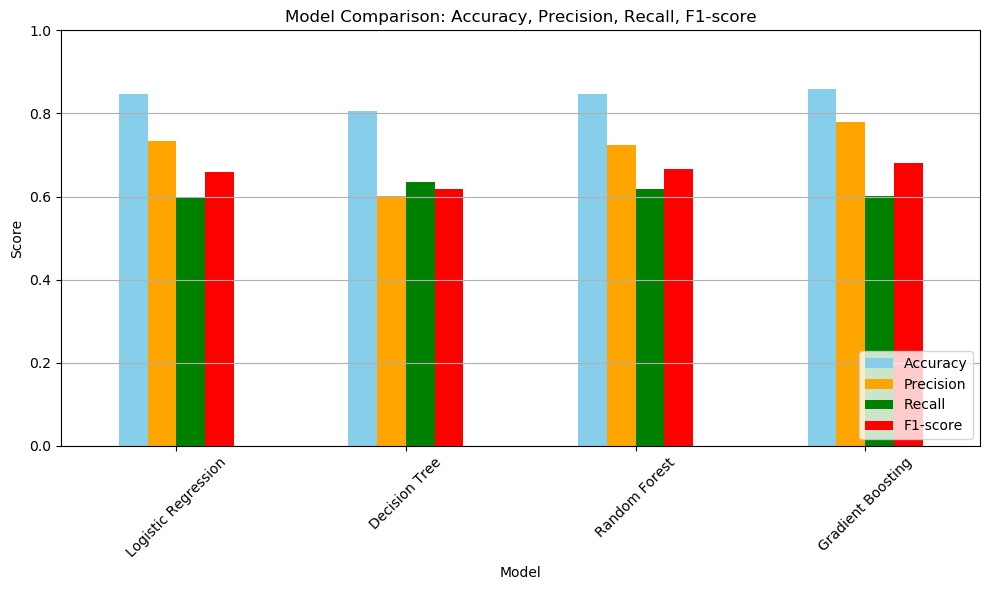

In [15]:
import matplotlib.pyplot as plt

metrics_df.set_index("Model").plot(kind="bar", figsize=(10,6), color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Model Selection and Deployment
Based on the evaluation metrics, we select the best performing model for deployment. The chosen model is then saved and integrated into a Streamlit app for interactive predictions.

In [16]:
best_model = models['Gradient Boosting']
print("The best performing model is:", 'Gradient Boosting')

The best performing model is: Gradient Boosting


## Gradient Boosting Model training
Another gradient boosting model is trained to for Streamlit App with some selected features.

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import joblib

# Selected important features based on feature importance and familiarity
important_features = [
    'age',
    'workclass',
    'education',
    'occupation',
    'hours-per-week',
    'educational-num'
    ]

X_important = df[important_features]
y_important = df['income']

# Identify categorical columns in the important features
categorical_cols_imp = X_important.select_dtypes(include='object').columns.tolist()

# Preprocessing pipeline
preprocessor_imp = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_imp)
], remainder='passthrough')

# Build the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor_imp),
    # Set with_mean=False to avoid ValueError with sparse matrix
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', GradientBoostingClassifier())
    ])

# Train/test split
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important, y_important, test_size=0.2, random_state=42, stratify=y_important
)

# Fit pipeline
pipeline.fit(X_train_imp, y_train_imp)

# Save the entire pipeline
joblib.dump(pipeline, 'salary_pipeline_streamlit.pkl')
print("Saved pipeline for Streamlit app with only important columns and fixed column order.")


Saved pipeline for Streamlit app with only important columns and fixed column order.


## Streamlit App for Salary Prediction
Deploy the trained pipeline using a Streamlit web app. The app allows users to input employee details and predict salary class, as well as perform batch predictions using CSV uploads.

In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained pipeline (preprocessor + scaler + model)
pipeline = joblib.load("salary_pipeline_streamlit.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"
])
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
educational_num = st.sidebar.slider("Education Number (educational-num)", 1, 16, 10)

# Build input DataFrame (must match training columns)
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'educational-num': [educational_num]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = pipeline.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = pipeline.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [19]:
!streamlit run app.py

^C
